In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

file = "data/demographics.csv"
csv = pd.read_csv(file, low_memory=False)

# Version numbers are meaningless
sixminutev4 = pd.read_csv('data/6minutewalkV4-V2.csv') # table 
sixminutev6 = pd.read_csv('data/6minutewalkV4-V6.csv')
sixminutev1 = pd.read_csv('data/6minutewalkV4-V1.csv') # table
sixminutev2 = pd.read_csv('data/6minutewalkV2.csv')
cvhealth = pd.read_csv('data/CVHealth.csv')

csv.drop(columns=['ROW_ID', 'ROW_VERSION', 'appVersion', 'phoneInfo', 'dataGroups', 'uploadDate', 'createdOn', 
                  'validationErrors', 'userSharingScope', 'NonIdentifiableDemographics.json.patientGoSleepTime', 
                  'NonIdentifiableDemographics.patientGoSleepTime', 'createdOnTimeZone',
                 'NonIdentifiableDemographics.json.patientWakeUpTime', 'NonIdentifiableDemographics.patientWakeUpTime'
                 , 'externalId'], 
         inplace=True)
csv.rename(columns={'NonIdentifiableDemographics.json.patientWeightPounds': 'weight', 'NonIdentifiableDemographics.patientWeightPounds': 'weight2', 
                    'NonIdentifiableDemographics.json.patientBiologicalSex': 'sex', 
                    'NonIdentifiableDemographics.patientBiologicalSex': 'sex2',
                   'NonIdentifiableDemographics.json.patientHeightInches': 'height',
                   'NonIdentifiableDemographics.patientHeightInches': 'height2',
                   'NonIdentifiableDemographics.json.patientCurrentAge': 'currentAge',
                   'NonIdentifiableDemographics.patientCurrentAge': 'currentAge2'}, inplace=True)

# drop the test version
csv = csv.iloc[7:]
csv.index = range(44804)
csv.dropna(how='all', subset=['currentAge','currentAge2'], inplace=True)
csv.dropna(how='all', subset=['weight', 'weight2'], inplace=True)
csv.dropna(how='all', subset=['sex', 'sex2'], inplace=True)
csv.dropna(how='all', subset=['height', 'height2'], inplace=True)

csv['currentAge'] = csv['currentAge'].fillna(csv['currentAge2'])
csv['weight'] = csv['weight'].fillna(csv['weight2'])
csv['height'] = csv['height'].fillna(csv['height2'])
csv['sex'] = csv['sex'].fillna(csv['sex2'])
csv = csv.drop('currentAge2',1)
csv = csv.drop('weight2',1)
csv = csv.drop('height2',1)
csv = csv.drop('sex2',1)

# Dropping the duplicate healthCode records... Don't know if this is the right thing to do but can easily be reversed
csv = csv.drop_duplicates(subset='healthCode', keep='last', inplace=False)

# Dropping the rows with 0 for any metric. This was not caught with the NaN cleaning/merging 
csv = csv[csv.currentAge != 0]
csv = csv[csv.weight != 0]
csv = csv[csv.height != 0]

sixminutev4.drop(columns=['phoneInfo', 'appVersion', 'dataGroups', 'externalId', 'phoneInfo', 'ROW_VERSION', 
                             'ROW_ID', 'deviceMotion_fitness.rest.items', 
                             'heartRate_fitness.rest.items', 'userSharingScope',
                            'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items',
                            'deviceMotion_fitness.walk.items', 'heartRate_fitness.walk.items',
                            'accel_fitness_rest.json.items', 'createdOnTimeZone', 'recordId',
                            'uploadDate', 'validationErrors', 'createdOn', 'measurementSystem.measurementSystem',
                            'measurementSystem.deviceRegion'], inplace=True)
sixminutev6.drop(columns=['recordId', 'appVersion', 'externalId', 'dataGroups', 'createdOn', 'phoneInfo', 
                             'restingEnergyBurned_fitness.rest', 'restingEnergyBurned_fitness.walk', 'activeEnergyBurned_fitness.rest', 
                             'activeEnergyBurned_fitness.walk', 'measurementSystem.deviceRegion', 'measurementSystem.measurementSystem', 
                             'heartRate_fitness.rest', 'ROW_ID', 'ROW_VERSION', 'uploadDate',
                            'validationErrors', 'userSharingScope', 'accel_fitness_walk.json',
                            'deviceMotion_fitness.walk', 'userSharingScope','createdOnTimeZone',
                            'heartRate_fitness.walk', 'pedometer_fitness.walk', 'deviceMotion_fitness.rest',
                            'accel_fitness_rest.json'], inplace=True)

sixminutev1.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'uploadDate', 'phoneInfo',
                         'externalId', 'dataGroups', 'createdOn', 'createdOnTimeZone', 'userSharingScope',
                         'validationErrors', 'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items',
                         'deviceMotion_fitness.walk.items', 'HKQuantityTypeIdentifierHeartRate_fitness.walk.items',
                         'accel_fitness_rest.json.items', 'deviceMotion_fitness.rest.items',
                         'HKQuantityTypeIdentifierHeartRate_fitness.rest.items', 'measurementSystem.measurementSystem',
                         'measurementSystem.deviceRegion'], inplace=True)

sixminutev2.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'uploadDate', 'phoneInfo', 'createdOn', 
                          'pedometer_fitness.walk.items', 'accel_fitness_walk.json.items', 'deviceMotion_fitness.walk.items', 
                         'HKQuantityTypeIdentifierHeartRate_fitness.walk.items', 'accel_fitness_rest.json.items',
                         'deviceMotion_fitness.rest.items', 'HKQuantityTypeIdentifierHeartRate_fitness.rest.items',
                         'externalId', 'dataGroups'], inplace=True)

sixminutewalktotal = pd.concat([sixminutev4, sixminutev6])
# Re-index to represent the actual length of the series
sixminutewalktotal.index = range(3373)
#csv
csv = csv[csv['healthCode'].isin(sixminutewalktotal['healthCode'])]
# Re-index 
csv.index = range(994)
cvhealth.drop(columns=['ROW_ID', 'ROW_VERSION', 'recordId', 'appVersion', 'phoneInfo', 'uploadDate', 
                             'externalId', 'dataGroups', 'createdOn', 
                             'createdOnTimeZone', 'userSharingScope', 'validationErrors', 
                             'family_history', 'medications_to_treat', 'vascular', 'ethnicity',
                            'race', 'education'], inplace=True)

csv = csv[csv['healthCode'].isin(cvhealth['healthCode'])]
# Re-index after dropping those without CVD data
csv.index = range(851)
healthCodeTotal = csv["healthCode"].values

v4 = csv[csv['healthCode'].isin(sixminutev4['healthCode'])]
v6 = csv[csv['healthCode'].isin(sixminutev6['healthCode'])]
v2 = csv[csv['healthCode'].isin(sixminutev2['healthCode'])]
v1 = csv[csv['healthCode'].isin(sixminutev1['healthCode'])]

v4 = np.asarray(v4['healthCode'].values)
v2 = np.asarray(v2['healthCode'].values)
v1 = np.asarray(v1['healthCode'].values)
v6 = np.asarray(v6['healthCode'].values)
sixminutetotalhc = np.concatenate((v4, v2, v1, v6))
csv.head()

,recordId,healthCode,weight,sex,height,currentAge
0,b141e6da-ba2a-4267-82a7-8484ec264afc,660c450e-456c-4835-8cad-3d8842492913,200.0,Male,75.0,67.0
1,aa326e81-349d-4c95-9c15-4cf78fbda5eb,b04ae29d-7c3e-49fb-951b-69a6bead8ad9,209.0,Male,76.0,66.0
2,6056f89a-9827-4a28-b67c-fad59b97f793,bfdf60c0-c322-47f0-8a47-a52c7dc50ab9,92.0,Male,73.0,34.0
3,66aed6d3-f6e4-4ec0-be76-eed94d6db501,32ee6b1e-e3c9-48f2-b4e4-1d29ca134ce6,123.0,Female,67.0,30.0
4,1da48794-aefb-44a4-84da-e0cbafcff92a,552417f4-a4aa-4004-b1a7-0e97ac3b316a,204.0,Female,63.0,62.0


# Sparsity Check

In [30]:
import os
import pandas as pd
# change this depending on data directory
directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

# number of gaps in a given 6MWT that surpasses the threshold 
def find_gaps(directory):
    '''
    Finds the number of gaps over 0.01 seconds and adds a gap if the difference between last and first timestamp is 
    less than 6 minutes
    Checking the length of the dict returned will show whether the amount of files matches the intersection of 
    6mwt table and demographics
    '''
    hc_gaps = dict()
    for subdir, dirs, files in os.walk(directory):
        # make in [list] a parameter of the function -- remember to change "in [list]" to the correct list
        if subdir.decode()[subdir.decode().rfind('/')+1:] in v6:
            # Makes sure we only get one file per healthCode
            i = 0
            for file in files:
                while (i < 1):
                    a_df = pd.read_json(os.path.join(subdir.decode(), file.decode())).set_index('timestamp')
                    inst = list(a_df.index[1:]-a_df.index[:-1] > .02).count(True)
                    # This line checks for incomplete 6MWT
                    if (a_df.index[-1] - a_df.index[0]) < 358:
                        inst = inst + 1
                    hc_gaps.update({subdir.decode()[subdir.decode().rfind('/')+1:]: inst})
                    i += 1
                
    return hc_gaps




# 6MWT Total Sample Check

### healthCodes of interest/associated synapse table:

1. cab9f4ee-54e0-4b08-8eba-3b48085bd142 (v4-v1)
2. 33f22bad-4570-43bb-bf68-263e6865ef76 (v4-v1)
3. ff489c8a-f5ff-4f00-9682-33c44df02621 (v4-v2)
4. 6fd3148e-f490-417a-9da8-a31d947e7aed (v4-v1)
5. bb6613c1-5b48-4744-a5f5-2387149da94d (v4-v2)
6. 43dcb6b4-24a9-4b71-bc9f-eef87e8adadb (v4-v2)
7. fe1e5f81-ed68-4c45-b1a7-3a7443d5ae76 (v4-v2)
8. 047b75f9-2778-4068-bc30-d47e8ea0780e (v4-v1)
9. c6a9c011-defc-48a9-bd74-de6d3a72d2bd (v4-v2)
10. e30dae44-8b7e-41a5-98e5-3f8abba35352 (v4-v1)

In [86]:
# hc_filenum is the dictionary which stores the healthCode and num of files associated with that healthCode

# num_of_files is just a list to count number of instances of certain number of files (Are there 0 files, 1 file...?)

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)
hc_filenum = dict()
for subdir, dirs, files in os.walk(directory):
    i = 0
    for file in files:
        i += 1
    hc_filenum.update({subdir.decode()[subdir.decode().rfind('/') + 1:]: i})


num_of_files = []
for k, v in test.items():
        num_of_files.append(v)

In [87]:
print(num_of_files.count(0))
print(len(hc_filenum))

2291
8129


/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


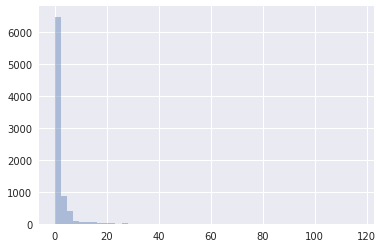

In [80]:
%matplotlib inline
sns.distplot(num_of_files, kde=False, rug=False)

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


TypeError: '<' not supported between instances of 'dict' and 'float'

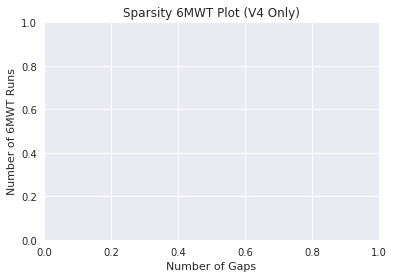

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

plt.title('Sparsity 6MWT Plot (V4 Only)')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')
sns.distplot(v4_onlydict, bins=400, kde=False, rug=False, color='purple')


/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


285

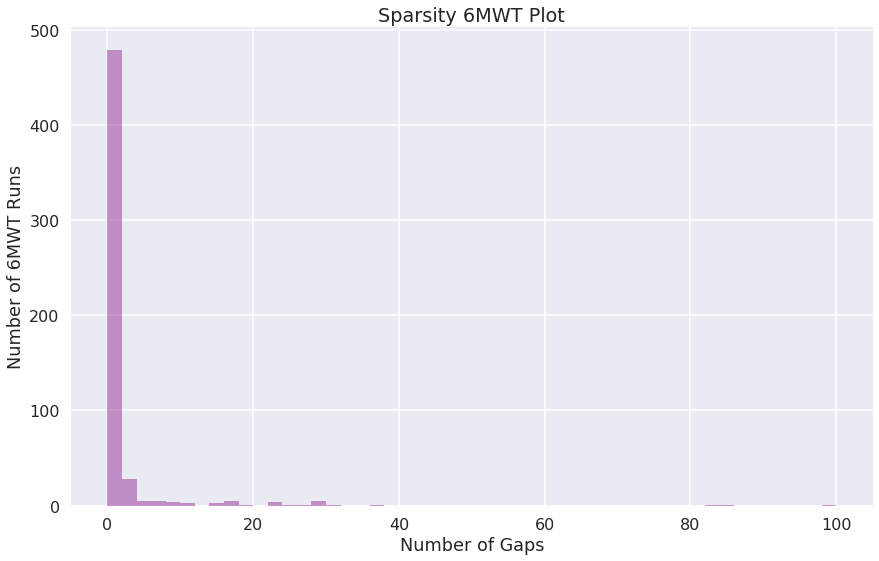

In [95]:
plt.title('Sparsity 6MWT Plot')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')
sns.distplot(v4_only, kde=False, rug=False, color='purple')

In [23]:
import pickle

# Save our gaps list so that we don't have to re-run
with open("gaps.txt", "wb") as fp:
    pickle.dump(instances, fp)

In [25]:
# This is so that we can re-open our gaps list
with open("gaps.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)

8269

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


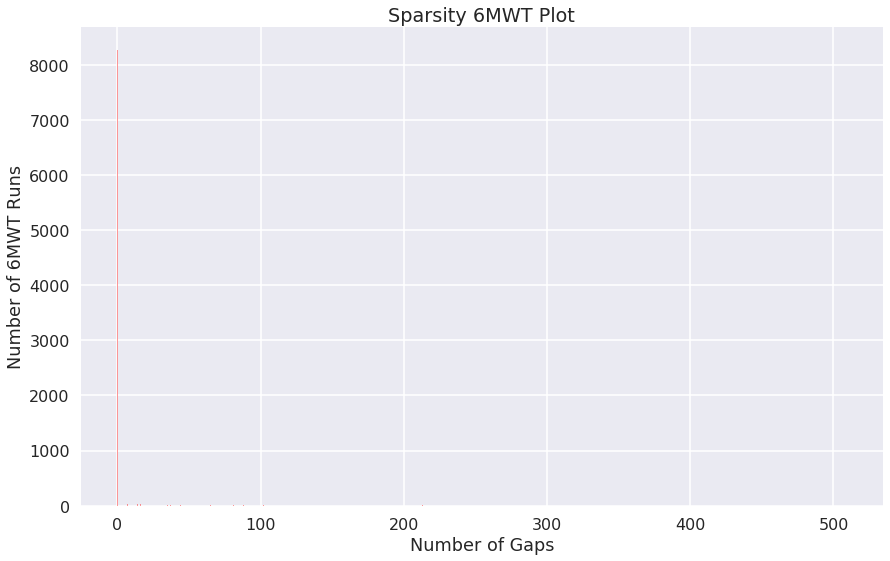

In [62]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
plt.style.use('seaborn-poster')
plt.title('Sparsity 6MWT Plot')
# Set x-axis label
plt.xlabel('Number of Gaps')
# Set y-axis label
plt.ylabel('Number of 6MWT Runs')

sns.distplot(instances, bins=5000, kde=False, rug=False, color='red')

# Feature Generation - 30 features
### Fix for the new dataframe format

In [2]:
import numpy as np
import peakutils
from numpy import linalg as LA
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Mean - 6 features
def get_time_mean(x_, y_, z_):
    mux_t = np.mean(x_, axis=1)
    muy_t = np.mean(y_, axis=1)
    muz_t = np.mean(z_, axis=1)
    return (mux_t, muy_t, muz_t)

def get_freq_mean(x_, y_, z_):
    mux_f = np.mean(np.absolute(fft(x_)), axis=1)
    muy_f = np.mean(np.absolute(fft(y_)), axis=1)
    muz_f = np.mean(np.absolute(fft(z_)), axis=1)
    return (mux_f, muy_f, muz_f)

# Median - 6 features
def get_time_median(x_, y_, z_):
    medx_t = np.median(x_, axis=1)
    medy_t = np.median(y_, axis=1)
    medz_t = np.median(z_, axis=1)
    return (medx_t, medy_t, medz_t)

def get_freq_median(x_, y_, z_):
    medx_f = np.median(np.absolute(fft(x_)), axis=1)
    medy_f = np.median(np.absolute(fft(y_)), axis=1)
    medz_f = np.median(np.absolute(fft(z_)), axis=1)
    return (medx_f, medy_f, medz_f)

# Magnitude - 6 features

# Don't really need magnitude since we already have 5 features from magnitude alone
#magx_t = (LA.norm(accelx_, axis=1) / 200)
#magy_t = (LA.norm(accely_, axis=1) / 200)
#magz_t = (LA.norm(accelz_, axis=1) / 200)

#magx_f = (LA.norm(fft(accelx_), axis=1) / 200)
#magy_f = (LA.norm(fft(accely_), axis=1) / 200)
#magz_f = (LA.norm(fft(accelz_), axis=1) / 200)

# Cross-correlation - 2 features

def get_cross_corr(x_, y_, z_):
    meanx = np.mean(x_, axis=1)
    meany = np.mean(y_, axis=1)
    meanz = np.mean(z_, axis=1)
    corr_xz = meanx/meanz
    corr_yz = meany/meanz
    return (corr_xz, corr_yz)

# Peak Count - 1 feature

# Don't really need this since we get peak count from magnitude
def peak_counter(accel_windows):
    '''
    This function counts the number of peaks in by window in each acceleration dimension using peakutils library
    Below we are averaging peaks over each dimension, combining all axes, and re-averaging for a final feature
    '''
    peaks = []
    for i in range(len(accel_windows)):
        peaks.append(len(peakutils.indexes(accel_windows[i])))
    return peaks

#peaks_x = np.mean(peak_counter(accelx_))
#peaks_y = np.mean(peak_counter(accely_))
#peaks_z = np.mean(peak_counter(accelz_))
#total = [peaks_x, peaks_y, peaks_z]
#avg_peaks = np.mean(total)

# Distance Between Peaks - 3 features

# Don't really want this...
def dist_peak(accel_windows):
    # This is in seconds because timestamps are in seconds not ms
    sec_per_index = 0.01
    time_diffs = []
    for i in range(len(accel_windows)):
        peak_indices = peakutils.indexes(accel_windows[i])
        # Finds difference between consecutive index values so that we can multiply by 0.01 seconds
        dummy = [t - s for s, t in zip(peak_indices, peak_indices[1:])]
        for j in range(len(dummy)):
            time_diffs.append(dummy[j] * sec_per_index)
    return time_diffs

# Spectral Centroid - 3 features

def spectral_centroid(x_, y_, z_):
    accel_freqx = fft(x_)
    accel_freqy = fft(y_)
    accel_freqz = fft(z_)
    centroids_x = []
    centroids_y = []
    centroids_z = []
    for i in range(len(x_)):
        sumx = 0
        sumy = 0
        sumz = 0
        for j in range(len(x_[i])):
            sumx += (x_[i][j] * accel_freqx[i][j] / 200)
            sumy += (y_[i][j] * accel_freqy[i][j] / 200)
            sumz += (z_[i][j] * accel_freqz[i][j] / 200)
        centroids_x.append(sumx)
        centroids_y.append(sumy)
        centroids_z.append(sumz)
    return (np.absolute(centroids_x), np.absolute(centroids_y), np.absolute(centroids_z))

# Average Difference from the Mean - 3 features

def average_dist_mean(x_, y_, z_, mux_t, muy_t, muz_t):
    realx = []
    realy = []
    realz = []
    dummyx = []
    dummyy = []
    dummyz = []
    for i in range(len(x_)):
        for j in range(len(x_[i])):
            dummyx.append(abs(x_[i][j] - mux_t[i]))
            dummyy.append(abs(y_[i][j] - muy_t[i]))
            dummyz.append(abs(z_[i][j] - muz_t[i]))
        realx.append(np.mean(dummyx))
        realy.append(np.mean(dummyy))
        realz.append(np.mean(dummyz))
    return (realx, realy, realz)

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from keras.models import Sequential
import json, os
from scipy.fftpack import fft, ifft
import itertools as it
import seaborn as sns
sns.set()

#directory_in_str = '/Users/bhargavyadavalli/Desktop/files'
#directory = os.fsencode(directory_in_str)

'''
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print(filename[0:36])
'''
# The block above will print the file name without the '.json'


def moving_window(accelx, length, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + 99) for stream, i in zip(streams, it.count(step=step))])

def getTimestamp(fn):
    timestamp = []
    with open(fn) as f:
        a = json.load(f)
        for obj in a:
            timestamp.append(obj['timestamp'])
    return timestamp

def getAccelX(fn):
    accelx = []
    with open(fn) as f:
        a = json.load(f)
        accelx = [obj['userAcceleration']['x'] for obj in a]
    accelx_norm = [(sample - np.mean(accelx)) for sample in accelx]
    for _ in range(200, len(accelx), 100):
        accelx_window = list(moving_window(accelx_norm, 200))
    accelx_window = np.asarray(accelx_window)
    return (accelx, accelx_window, accelx_norm)

def getAccelY(fn):
    accely = []
    with open(fn) as f:
        a = json.load(f)
        accely = [obj['y'] for obj in a]
    accely_norm = [(sample - np.mean(accely)) for sample in accely]
    for _ in range(200, len(accely), 100):
        accely_window = list(moving_window(accely_norm, 200))
    accelx_window = np.asarray(accely_window)
    return (accely, accely_window, accely_norm)
            
def getAccelZ(fn):
    accelz = []
    with open(fn) as f:
        a = json.load(f)
        accelz = [obj['z'] for obj in a]
    accelz_norm = [(sample - np.mean(accelz)) for sample in accelz]
    for _ in range(200, len(accelz), 100):
        accelz_window = list(moving_window(accelz_norm, 200))
    accelz_window = np.asarray(accelz_window)
    return (accelz, accelz_window, accelz_norm)


def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

# Show structure
#print(accelx_)

# Printing last element of first sub-list
#print(accelx_[0][100])

# Print middle element to show sliding window 
#print(accelx_[1][0])

# Show same element in the dataframe
#print(df.iloc[100])

# Check to see if last sub-list is same length as the rest
#print(len(accelx_))


# Use this for timestamp analysis/6MWT completeness check:

#df = pd.DataFrame({'x': getAccelX('/home/users/bhargavy/gait/data/test_accel_old2.json')[1], 'y': getAccelY('/home/users/bhargavy/gait/data/test_accel_old2.json')[1], 
#                'z': getAccelZ('/home/users/bhargavy/gait/data/test_accel_old2.json')[1]}, 
#                  columns=['x', 'y', 'z'])
#df

In [10]:
new_demographics = filter_demographics(csv)

In [20]:
from heapq import nlargest
from scipy.fftpack import fft
import peakutils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as LA
import itertools as it
import os

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

def moving_window(accelx, length, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + 99) for stream, i in zip(streams, it.count(step=step))])

# prior to calling any of these functions please verify that dataframe is normalized & sliding windows are present
def fundamental_frequency(mag_):
    fundamental_freqs = []
    for mag_seg in mag_:
        ft_seg = fft(mag_seg)
        fundamental_freqs.append(LA.norm(np.mean(nlargest(3, ft_seg))))
    return np.asarray(fundamental_freqs)

def average_acceleration(mag_):
    return [np.mean(x) for x in mag_]

def peak_counter(mag_):
    '''
    This function counts the number of peaks in by window in each acceleration dimension using peakutils library
    Below we are averaging peaks over each dimension, combining all axes, and re-averaging for a final feature
    '''
    peaks = []
    for i in range(len(mag_)):
        peaks.append(len(peakutils.indexes(mag_[i])))
    return peaks


def find_max(mag_):
    maxes = [max(x) for x in mag_]
    return maxes

def find_min(mag_):
    mins = [min(x) for x in mag_]
    return mins

def generate_features(healthcode, fn, merged_demographics):
    '''
    Applies normalization and sliding windows to the provided data file and 
    returns a dataframe with calculated features
    '''
    a_df = normalize_dataset(pd.read_json(fn).set_index('timestamp'))
    a_df_norm = np.sqrt(np.square(a_df).sum(axis=1))
    mag = np.asarray(a_df_norm)
    mag_ = list(moving_window(mag, 200))
    x = np.asarray(a_df.x)
    y = np.asarray(a_df.y)
    z = np.asarray(a_df.z)
    x_ = list(moving_window(x, 200))
    y_ = list(moving_window(y, 200))
    z_ = list(moving_window(z, 200))
    index = [healthcode for x in range(len(mag_))]
    weight = [merged_demographics.loc[healthcode].weight for y in range(len(mag_))]
    height = [merged_demographics.loc[healthcode].height for z in range(len(mag_))]
    sex = [merged_demographics.loc[healthcode].sex for q in range(len(mag_))]
    currentAge = [merged_demographics.loc[healthcode].currentAge for m in range(len(mag_))]
    # Applied log transformation to the max feature
    return pd.DataFrame({'healthCode': index, 'weight': weight, 'height': height, 'sex': sex, 'currentAge': currentAge, 
                         'fundamental_freq': fundamental_frequency(mag_), 'average_accel': average_acceleration(mag_), 
                         'peakcount': peak_counter(mag_), 'max': find_max(mag_), 'min': np.log(find_min(mag_)),
                        'mut_x': get_time_mean(x_, y_, z_)[0], 'mut_y': get_time_mean(x_, y_, z_)[1], 
                        'mut_z': get_time_mean(x_, y_, z_)[2], 'muf_x': get_freq_mean(x_, y_, z_)[0],
                        'muf_y': get_freq_mean(x_, y_, z_)[1], 'muf_z': get_freq_mean(x_, y_, z_)[2],
                        'medt_x': get_time_median(x_, y_, z_)[0], 'medt_y': get_time_median(x_, y_, z_)[1],
                        'medt_z': get_time_median(x_, y_, z_)[2], 'medf_x': get_freq_median(x_, y_, z_)[0],
                        'medf_y': get_time_median(x_, y_, z_)[1], 'medf_z': get_freq_median(x_, y_, z_)[2],
                        'cross_xz': get_cross_corr(x_, y_, z_)[0], 'cross_yz': get_cross_corr(x_, y_, z_)[1],
                        'spect_cent_x': spectral_centroid(x_, y_, z_)[0], 
                        'spect_cent_y': spectral_centroid(x_, y_, z_)[1],
                        'spect_cent_z': spectral_centroid(x_, y_, z_)[2],
                        'average_dist_meanx': average_dist_mean(x_, y_, z_, np.mean(x_, axis=1), np.mean(y_, axis=1), np.mean(z_, axis=1))[0],
                        'average_dist_meany': average_dist_mean(x_, y_, z_, np.mean(x_, axis=1), np.mean(y_, axis=1), np.mean(z_, axis=1))[1],
                        'average_dist_meanz': average_dist_mean(x_, y_, z_, np.mean(x_, axis=1), np.mean(y_, axis=1), np.mean(z_, axis=1))[2]},
                          columns=['healthCode', 'weight', 'height', 'sex', 'currentAge', 'fundamental_freq', 
                         'average_accel', 'peakcount', 'max', 'min', 'mut_x', 'mut_y', 'mut_z',
                         'muf_x', 'muf_y', 'muf_z', 'medt_x', 'medt_y', 'medt_z', 'medf_x',
                         'medf_y', 'medf_z', 'cross_xz', 'cross_yz', 'spect_cent_x', 'spect_cent_y',
                         'spect_cent_z', 'average_dist_meanx', 'average_dist_meany', 'average_dist_meanz']).set_index('healthCode')




In [3]:
def filter_subjects(directory):
    # creates dict with healthcodes and number of gaps from find_gaps function
    new_dict = find_gaps(directory)
    # filters dict to remove those entries with more than 2 gaps
    filtered_new_dict = { k:v for k, v in new_dict.items() if v <= 2 }
    healthcodes = []
    for k, v in filtered_new_dict.items():
        healthcodes.append(k)
    return healthcodes

In [4]:
def create_frame(directory):
    '''
    Creates a final dataframe with all samples from valid healthcodes
    This: subdir.decode()[subdir.decode().rfind('/')+1:] just gets the healthcode part of a directory 
    Function should be slow with large amounts of files due to the concat Pandas function
    '''
    healthcodes = filter_subjects(directory)
    frames = []
    for subdir, dirs, files in os.walk(directory):
        if subdir.decode()[subdir.decode().rfind('/')+1:] in healthcodes:
            i = 0
            for file in files:
                while (i < 1):
                    # This line is generating our features dataframe with healthCode as first arg and filename as second arg
                    frames.append(generate_features(subdir.decode()[subdir.decode().rfind('/')+1:], 
                                                    os.path.join(subdir.decode(), file.decode()), 
                                                    new_demographics))
                    i += 1
    return pd.concat(frames)



In [23]:
test_v4 = create_frame(directory)

In [25]:
test_v2 = create_frame(directory)

In [29]:
test_v1 = create_frame(directory)

In [31]:
test_v6 = create_frame(directory)

In [14]:
# This is all of the tables together removing any duplicate runs that might appear between tables
# At this point we have not reduced to minimum number of samples 
newtotal_df = pd.concat([test_v4, test_v2, test_v1, test_v6]).drop_duplicates()

NameError: name 'test_v4' is not defined

In [33]:
len(list(set(newtotal_df.index)))

175

In [34]:
newtotal_df.to_hdf('newtotal_df.h5', key='df', mode='w')

In [8]:
newtotal_df  = pd.read_hdf('newtotal_df.h5', 'df')

In [11]:
def filter_demographics(demographics):
    merged = pd.DataFrame()
    indexlist = list(csv.healthCode)
    for e in list(set(newtotal_df.index)):
        if e in indexlist:
            merged = merged.append(csv.loc[csv['healthCode'] == e])
    merged = merged.drop(['recordId'], axis=1)
    merged = merged.set_index('healthCode')
    return merged

def find_lowest_num_samples(total_df):
    '''
    This function finds the minimum number of samples from all of the runs present so that we keep same dimensions
    for every run that we have
    '''
    total = [len(total_df.loc[x].average_accel) for x in list(set(total_df.index))]
    return min(total)

def min_df(lowest_num_of_samples, total_df):
    '''
    Returns the dataframe with features for every healthCode present so that there are only the minimum amount of 
    samples needed
    '''
    newdf = pd.DataFrame()
    unique_healthcodes = list(set(total_df.index))
    for elem in unique_healthcodes:
        newdf = newdf.append(total_df.loc[elem].iloc[:lowest_num_of_samples])
    return newdf

In [21]:
# number of unique hc is 175
# testing contains a uniform number of samples for every 6 minute walk test
everything = min_df(find_lowest_num_samples(newtotal_df), newtotal_df)
# Filter out the outlier weights

# Now the number of unique healthCodes should actually be 173 (one 6MWT per healthCode)

In [25]:
everything = everything[everything.weight < 400]
everything = everything[everything.weight > 80]

# this dataframe doesn't have demographic data
everything_no_demog = everything.drop(columns=['sex', 'currentAge', 'weight', 'height'])

# Random Forest Classifier Code
1. Start by separating training and testing data... 139 for train and 34 for test
2. Create output labels for every training example for i in range(1, 173)... for j in range(0, 351)...
3. Build Random Forest
4. Train

In [75]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

# Shouldn't have to one-hot encode the sex because using random forest
# One-hot encode ouput
numOfTotalHC = 173
numOfTrainHC = 139
numOfTestHC = 34

# Splits the training and testing into 80/20 with no sample scrambling
# Must scramble after so that training set has no test samples in it
training = everything.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = everything.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

uniques, labeling = pd.factorize(training.sex)
uniques2, labeling2 = pd.factorize(testing.sex)

n = training.columns[2]
training.drop(n, axis = 1, inplace = True)
training.insert(2, 'sex', uniques)
# Male is 0 and Female is 1
training['sex'] = training['sex'].astype(np.float64)
training['peakcount'] = training['peakcount'].astype(np.float64)

m = testing.columns[2]
testing.drop(m, axis = 1, inplace = True)
testing.insert(2, 'sex', uniques2)
# Male is 0 and Female is 1
testing['sex'] = testing['sex'].astype(np.float64)
testing['peakcount'] = testing['peakcount'].astype(np.float64)

# list of all of our features

features = training.columns[:]

# labeling our unique outputs
y = pd.factorize(training.index.values)[0]

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(training[features], y)

/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [111]:
everything_no_demog.loc['6f443735-81c0-457e-a334-58bb3a89168e']['min']

healthCode
6f443735-81c0-457e-a334-58bb3a89168e   -2.471499
6f443735-81c0-457e-a334-58bb3a89168e   -2.471499
6f443735-81c0-457e-a334-58bb3a89168e   -2.913936
6f443735-81c0-457e-a334-58bb3a89168e   -2.913936
6f443735-81c0-457e-a334-58bb3a89168e   -2.361983
6f443735-81c0-457e-a334-58bb3a89168e   -2.581776
6f443735-81c0-457e-a334-58bb3a89168e   -2.581776
6f443735-81c0-457e-a334-58bb3a89168e   -1.800203
6f443735-81c0-457e-a334-58bb3a89168e   -1.739838
6f443735-81c0-457e-a334-58bb3a89168e   -1.948717
6f443735-81c0-457e-a334-58bb3a89168e   -1.948717
6f443735-81c0-457e-a334-58bb3a89168e   -1.758329
6f443735-81c0-457e-a334-58bb3a89168e   -2.096694
6f443735-81c0-457e-a334-58bb3a89168e   -2.489845
6f443735-81c0-457e-a334-58bb3a89168e   -2.780954
6f443735-81c0-457e-a334-58bb3a89168e   -2.780954
6f443735-81c0-457e-a334-58bb3a89168e   -2.713959
6f443735-81c0-457e-a334-58bb3a89168e   -2.091379
6f443735-81c0-457e-a334-58bb3a89168e   -2.077187
6f443735-81c0-457e-a334-58bb3a89168e   -3.038534
6f443735-

In [116]:
final = []
for x in list(set(everything_no_demog.index)):
    
    final.append(list(everything_no_demog.loc[x]['max'].values))

In [117]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
X = np.array(final)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X)
kmeans.labels_

array([67, 77, 69, 56, 15, 93, 11, 67, 25, 19, 62, 94, 62, 74, 92, 59, 52,
       94, 14, 49, 70, 34, 16, 46, 74, 58, 75, 20, 73, 37, 62, 60, 64, 82,
       67, 18, 61, 87, 67, 33, 49, 57, 59, 43, 99, 53, 45, 70, 70, 70, 26,
       43, 76, 59, 36, 29, 67, 16, 13, 16, 62, 70, 90,  4, 94, 67, 32, 70,
       83, 47,  3,  3, 28, 38, 16, 96, 97,  7, 42, 23, 67, 86, 10, 50, 70,
       17, 70, 43, 49, 67,  8, 94, 16, 24, 70, 88, 27, 67,  2, 43, 70, 16,
       67, 67, 16, 88, 59, 43, 96, 43, 54, 40,  6, 70,  3, 71, 51, 84, 81,
       89, 44, 55,  5, 95, 68, 84, 48, 80, 94, 43, 21, 31, 16, 26,  3, 16,
       43, 67, 35, 12, 67, 91, 78, 65,  9, 70, 59, 43, 66, 39, 67, 67, 43,
       67, 16, 41, 59, 22, 67, 30, 67, 98, 10, 70, 88,  0, 63, 43, 72, 67,
        1, 79, 85], dtype=int32)

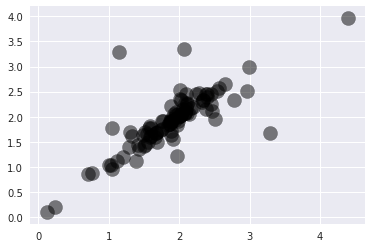

In [118]:
%matplotlib inline
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


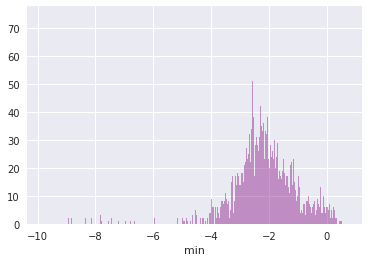

In [45]:
import seaborn as sns
sns.set()
sns.distplot(everything['min'], bins=10000, kde=False, rug=False, color='purple')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


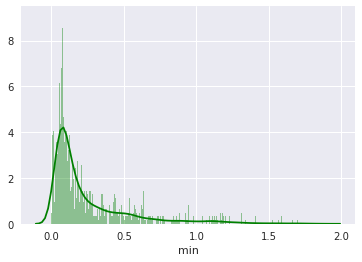

In [51]:
sns.distplot(total_df['min'], bins=10000, kde=True, rug=False, color='green')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


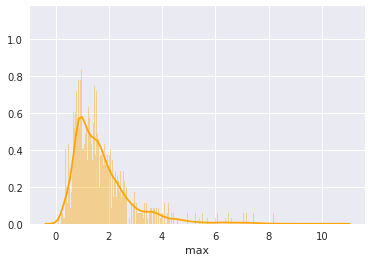

In [52]:
sns.distplot(total_df['max'], bins=10000, kde=True, rug=False, color='orange')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


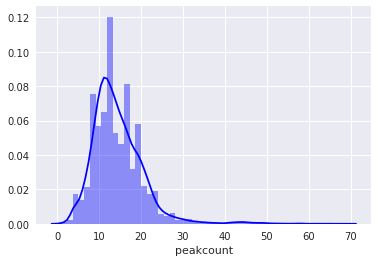

In [53]:
sns.distplot(total_df['peakcount'], bins=50, kde=True, rug=False, color='blue')

/home/users/bhargavy/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


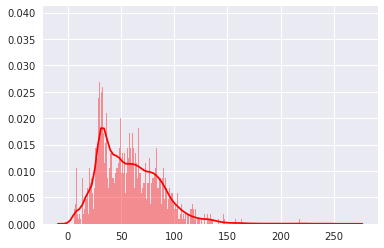

In [54]:
from numpy import linalg as LA
normed = [x for x in test_v4['fundamental_freq']]
sns.distplot(normed, bins= 10000, kde=True, rug=False, color='red')